In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Titanic

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
X = df.iloc[:,0:4]
Y = df.loc[:,'Survived']

In [5]:
dummies = pd.get_dummies(df['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
df = pd.concat([df,dummies],axis='columns')

In [7]:
df.drop('Sex',axis='columns',inplace=True)
df.head()

,Pclass,Age,Fare,Survived,female,male
0,3,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,1,0
2,3,26.0,7.9250,1,1,0
3,1,35.0,53.1000,1,1,0
4,3,35.0,8.0500,0,0,1


In [8]:
X = pd.concat([X,dummies],axis='columns')
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [9]:
X.drop(['Sex'],inplace=True,axis='columns')

In [10]:
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [12]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [13]:
X['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
meanAge = X['Age'].mean()
meanAge

29.69911764705882

In [15]:
X['Age'] = X['Age'].replace(np.NAN,meanAge)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [19]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
model.score(x_test,y_test)

0.8212290502793296

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[89, 17],
       [15, 58]])

Text(6.0, 0.5, 'Truth')

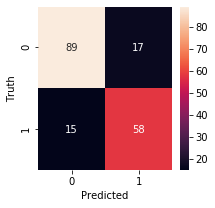

In [23]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model.predict_proba(x_test)

array([[2.22518649e-02, 9.77748135e-01],
       [6.03305562e-10, 9.99999999e-01],
       [1.98279699e-03, 9.98017203e-01],
       [9.75156442e-01, 2.48435584e-02],
       [9.87753711e-01, 1.22462888e-02],
       [6.44635946e-02, 9.35536405e-01],
       [9.69377870e-01, 3.06221296e-02],
       [1.56968167e-03, 9.98430318e-01],
       [9.89001294e-01, 1.09987059e-02],
       [9.75081831e-01, 2.49181694e-02],
       [8.55748375e-01, 1.44251625e-01],
       [9.85974117e-01, 1.40258829e-02],
       [1.94640006e-02, 9.80535999e-01],
       [9.88530317e-01, 1.14696830e-02],
       [9.88890978e-01, 1.11090217e-02],
       [9.88964172e-01, 1.10358276e-02],
       [3.08010718e-02, 9.69198928e-01],
       [9.89219702e-01, 1.07802977e-02],
       [9.89062496e-01, 1.09375042e-02],
       [9.87769182e-01, 1.22308177e-02],
       [1.92383939e-03, 9.98076161e-01],
       [9.73111156e-01, 2.68888439e-02],
       [9.88322788e-01, 1.16772117e-02],
       [9.88926094e-01, 1.10739063e-02],
       [9.649576

# Email Classification

In [44]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df['target'] = [0 if x=='ham' else 1 for x in df['Category']]
df.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [27]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [46]:
df.groupby('Category').describe()

target                                   
           count mean  std  min  25%  50%  75%  max
Category                                           
ham       4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam       747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Message'],df['target'],test_size=0.25)

In [48]:
df.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [55]:
x_test_count = v.transform(x_test)
model.score(x_test_count,y_test)

0.9877961234745154

# Sklearn Pipeline when Multiple transformations are applied on the data
# like here we have to first convert the text into numbers through countvectorizer() 

In [56]:
from sklearn.pipeline import Pipeline
clf = Pipeline(
    [
        ('vectorizer',CountVectorizer()),
        ('nb',MultinomialNB())
    ]
)

In [57]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
clf.score(x_test,y_test)

0.9877961234745154

In [59]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
clf.predict(emails)

array([0, 1])

In [63]:
from sklearn.datasets import load_wine
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [65]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [66]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [69]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [70]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [71]:
df.shape

(178, 14)

In [74]:
X = df.iloc[:,0:13]
Y = df['target']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [76]:
from sklearn.pipeline import Pipeline
clf = Pipeline(
    [
        ('nb',GaussianNB())
    ]
)

In [77]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('nb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [78]:
clf.score(x_test,y_test)

0.9722222222222222

In [79]:
clf.predict(x_test)

array([2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1])

In [80]:
from sklearn.pipeline import Pipeline
clf = Pipeline(
    [
        ('nb',MultinomialNB())
    ]
)

In [81]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [82]:
clf.score(x_test,y_test)

0.75